# 1 - Building and saving deep learning models
In this notebook all the deep learning models will be built and persisted.

## Setup

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import sys
import pathlib

# sets the path to the home directory of this repository so other modules can be imported. 
root_path = os.path.split(os.getcwd())[0]
assert root_path.endswith("mask-detection"), "The root path does not end with mask-detection: " + root_path 
sys.path.insert(0, root_path)
path = pathlib.Path(root_path + '/data/facemask-dataset')

# set the seed for reproducible results.
np.random.seed(0)
tf.random.set_seed(0)

# GPU settings
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

print(tf.__version__)

2.3.0


In [2]:
from datasets.facemask_dataset import FacemaskDataset
batch_size = 64
train_percentage = 0.6
validation_percentage = 0.2
test_percentage = 0.2
ds = FacemaskDataset(path, batch_size, 200, 200, True, train_percentage, validation_percentage, test_percentage)

train: 36 validation: 12 test: 12


## Building models

In [3]:
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

model = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255),
    Conv2D(32, 3, activation='relu'),
    MaxPooling2D(),
    Dropout(0.3),
    Conv2D(32, 3, activation='relu'),
    MaxPooling2D(),
    Dropout(0.3),
    Conv2D(32, 3, activation='relu'),
    MaxPooling2D(),
    Dropout(0.3),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.1),
    Dense(1, activation='sigmoid')
])

In [4]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss=BinaryCrossentropy(),
    metrics=['acc'])

In [5]:
from tensorflow.keras.callbacks import EarlyStopping

# Add a callback for earlystopping
callbacks = [EarlyStopping(patience=10, monitor='val_loss')]

history = model.fit(
    x=ds.train_ds,
    validation_data=ds.val_ds,
    epochs=100,
    validation_steps=ds.val_size,
    steps_per_epoch=ds.train_size,
    callbacks=callbacks
)

Epoch 1/100
36/36 [==============================] - 61s 2s/step - loss: 0.6929 - acc: 0.5139 - val_loss: 0.6926 - val_acc: 0.4766
Epoch 2/100
36/36 [==============================] - 1s 39ms/step - loss: 0.6900 - acc: 0.5404 - val_loss: 0.6862 - val_acc: 0.7370
Epoch 3/100
36/36 [==============================] - 1s 40ms/step - loss: 0.6797 - acc: 0.5781 - val_loss: 0.6672 - val_acc: 0.6549
Epoch 4/100
36/36 [==============================] - 1s 40ms/step - loss: 0.6540 - acc: 0.6328 - val_loss: 0.6272 - val_acc: 0.7096
Epoch 5/100
36/36 [==============================] - 1s 40ms/step - loss: 0.6112 - acc: 0.6940 - val_loss: 0.5676 - val_acc: 0.7656
Epoch 6/100
36/36 [==============================] - 1s 40ms/step - loss: 0.5530 - acc: 0.7448 - val_loss: 0.5039 - val_acc: 0.7969
Epoch 7/100
36/36 [==============================] - 1s 40ms/step - loss: 0.4935 - acc: 0.7930 - val_loss: 0.5125 - val_acc: 0.7487
Epoch 8/100
36/36 [==============================] - 1s 40ms/step - loss: 0.4

36/36 [==============================] - 1s 40ms/step - loss: 0.2198 - acc: 0.9167 - val_loss: 0.2196 - val_acc: 0.9180
Epoch 63/100
36/36 [==============================] - 1s 39ms/step - loss: 0.2164 - acc: 0.9175 - val_loss: 0.2196 - val_acc: 0.9180
Epoch 64/100
36/36 [==============================] - 1s 40ms/step - loss: 0.2196 - acc: 0.9162 - val_loss: 0.2157 - val_acc: 0.9180
Epoch 65/100
36/36 [==============================] - 1s 40ms/step - loss: 0.2159 - acc: 0.9180 - val_loss: 0.2143 - val_acc: 0.9167
Epoch 66/100
36/36 [==============================] - 1s 40ms/step - loss: 0.2152 - acc: 0.9188 - val_loss: 0.2141 - val_acc: 0.9180
Epoch 67/100
36/36 [==============================] - 1s 40ms/step - loss: 0.2145 - acc: 0.9188 - val_loss: 0.2093 - val_acc: 0.9206
Epoch 68/100
36/36 [==============================] - 1s 40ms/step - loss: 0.2149 - acc: 0.9201 - val_loss: 0.2120 - val_acc: 0.9180
Epoch 69/100
36/36 [==============================] - 1s 40ms/step - loss: 0.2110 

## Visualise training history

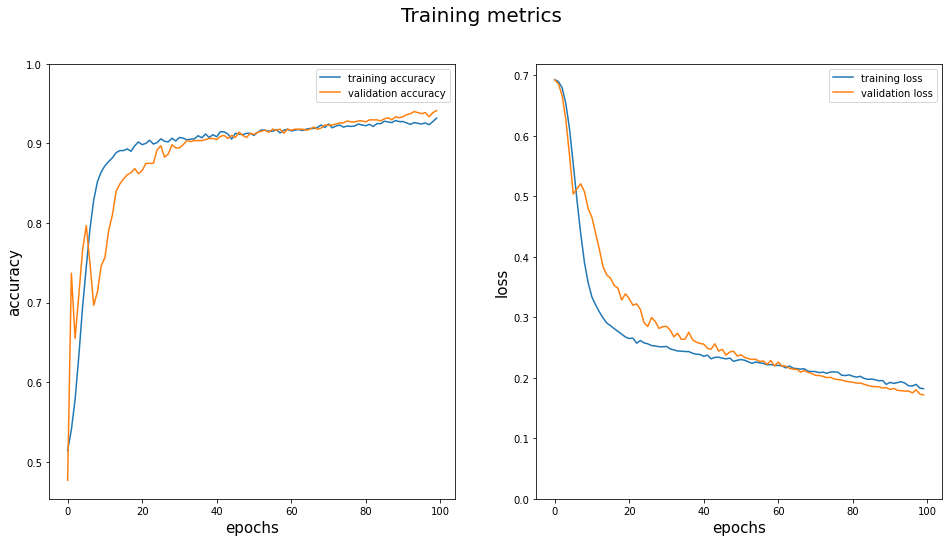

In [6]:
def visualise_results(history):
    def plot_graph(history, metric, label):
        plt.plot(history.history[metric])
        plt.plot(history.history['val_'+metric], '')
        plt.xlabel("epochs", fontsize=15)
        plt.ylabel(label, fontsize=15)
        plt.legend([f'training {label}', f'validation {label}'])

    fig = plt.figure(figsize=(16,8))
    fig.suptitle("Training metrics", fontsize=20)
    plt.subplot(1,2,1)
    plot_graph(history, 'acc', 'accuracy')
    plt.ylim(None,1)
    plt.subplot(1,2,2)
    plot_graph(history, 'loss', 'loss')
    plt.ylim(0,None)

visualise_results(history)

## Saving models

In [7]:
model.save(root_path + '/models/cnn1')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: C:\Users\Heijmans\Documents\Jupyter Notebooks\mask-detection/models/cnn1\assets
